# Ford GoBike System Data Analysis
## by Mostafa Atef
## Preliminary Wrangling

> This data set includes information about individual bike rides made in a bike-sharing system covering the greater San Francisco Bay area for Q1, 2020 Year, this data is downloaded through this reference https://s3.amazonaws.com/baywheels-data/index.html.

In [105]:
#Import all the needed packages and set the plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from pathlib import Path
import math
from math import radians, sin, cos, acos

%matplotlib inline

### Gathering

In [106]:
#Reading Q1, 2020 CSV files in df Dataframe

df = pd.concat((pd.read_csv(path,parse_dates=True,low_memory=False) for path in Path('.').rglob('*.csv')), ignore_index = True)


#Writing the concatenated data into one CSV file

df.to_csv('baywheels_trips_Q1_2020.csv', index=False)

In [107]:
df_Q1_2020 = pd.read_csv('baywheels_trips_Q1_2020.csv',parse_dates=True,low_memory=False)

### Assessing

In [108]:
df_Q1_2020.shape

(3620028, 14)

In [109]:
df_Q1_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620028 entries, 0 to 3620027
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  rental_access_method     object 
dtypes: float64(6), int64(2), object(6)
memory usage: 386.7+ MB


In [110]:
df_Q1_2020.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [111]:
df_Q1_2020.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
2255671,574,2020-02-01 18:33:45,2020-02-01 18:43:20,NaN,NaN,37.749893,-122.421261,NaN,NaN,37.749215,-122.420498,974864,Subscriber,app
1508107,637,2020-02-16 16:22:34,2020-02-16 16:33:12,NaN,NaN,37.781168,-122.409254,NaN,NaN,37.767045,-122.410692,593379,Subscriber,app
1886652,261,2020-01-09 20:31:16.2430,2020-01-09 20:35:37.2480,104.0,4th St at 16th St,37.767045,-122.390833,81.0,Berry St at 4th St,37.775880,-122.393170,10212,Customer,NaN
661430,637,2020-02-20 08:34:12,2020-02-20 08:44:49,24.0,Spear St at Folsom St,37.789677,-122.390428,NaN,NaN,37.775744,-122.413836,311723,Subscriber,app
1881517,1229,2020-01-10 21:38:52.1400,2020-01-10 21:59:21.5100,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,12008,Customer,NaN
385838,326,2020-02-07 19:30:12.3100,2020-02-07 19:35:38.8070,133.0,Valencia St at 22nd St,37.755213,-122.420975,122.0,19th St at Mission St,37.760299,-122.418892,12354,Customer,NaN
59217,822,2020-01-14 15:44:54.1310,2020-01-14 15:58:36.9840,187.0,Jack London Square,37.796248,-122.279352,200.0,2nd Ave at E 18th St,37.800214,-122.253810,12690,Customer,NaN
3394449,494,2020-02-28 13:48:30,2020-02-28 13:56:44,NaN,NaN,37.792847,-122.412763,NaN,NaN,37.792361,-122.403032,376086,Subscriber,app
1795964,780,2020-03-15 13:56:57,2020-03-15 14:09:58,384.0,Jackson St at Polk St,37.794160,-122.421568,NaN,NaN,37.789661,-122.440656,314751,Subscriber,app
1981546,310,2020-01-15 16:16:21,2020-01-15 16:21:32,NaN,NaN,37.768217,-122.426926,NaN,NaN,37.763393,-122.420872,261260,Subscriber,app


In [112]:
df_Q1_2020.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id           1945208
start_station_name         1940276
start_station_latitude           0
start_station_longitude          0
end_station_id             1943128
end_station_name           1938032
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
rental_access_method       1148596
dtype: int64

In [113]:
df_Q1_2020.duplicated().sum()

2378744

In [114]:
df_Q1_2020.user_type.value_counts()

Subscriber    2178784
Customer      1441244
Name: user_type, dtype: int64

In [115]:
df_Q1_2020.rental_access_method.value_counts()

app        2281884
clipper     189548
Name: rental_access_method, dtype: int64

#### Assessing Results

> - There are many missing values in the dataset (start_station_id, start_station_name, end_station_id, end_station_name)
> - Start and end times are not in the timestamp format
> - The following columns are not in date format:
    >> - start_time
    >> - end_time
> - Dataset does not has detailed start time values like hour of day and day of week
> - the following columns are categorical type:
    >> - user_type
    >> - rental_access_method
> - IDs (start_station_id, end_station_id, bike_id) not objects

In [116]:
#Take a copy from original datafram before cleaning
df_Q1_2020_clean = df_Q1_2020.copy()

### Cleaning

In [117]:
# Remove Duplicates
df_Q1_2020_clean = df_Q1_2020_clean.drop_duplicates()

In [118]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_Q1_2020_clean['bike_id'] = df_Q1_2020_clean['bike_id'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
df_Q1_2020_clean['start_station_id'] = df_Q1_2020_clean['start_station_id'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)
df_Q1_2020_clean['end_station_id'] = df_Q1_2020_clean['end_station_id'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)

In [119]:
# Convert start and End times from object to datetime
df_Q1_2020_clean['start_time'] = pd.to_datetime(df_Q1_2020_clean['start_time'])
df_Q1_2020_clean['end_time'] = pd.to_datetime(df_Q1_2020_clean['end_time'])

In [120]:
# Convert user type and rental method to categorical columns
df_Q1_2020_clean['user_type'] = df_Q1_2020_clean['user_type'].astype('category')
df_Q1_2020_clean['rental_access_method'] = df_Q1_2020_clean['rental_access_method'].astype('category')

In [121]:
# Detail the duration column through spliting it into many usefull columns
df_Q1_2020_clean['duration_minute'] = df_Q1_2020_clean['duration_sec']/60
df_Q1_2020_clean['start_date'] = df_Q1_2020_clean['start_time'].dt.strftime('%Y-%m-%d')
df_Q1_2020_clean['start_hourofday'] = df_Q1_2020_clean['start_time'].dt.strftime('%H')
df_Q1_2020_clean['start_dayofweek'] = df_Q1_2020_clean['start_time'].dt.strftime('%A')
df_Q1_2020_clean['start_month'] = df_Q1_2020_clean['start_time'].dt.strftime('%B')

In [122]:
# Convert the start_dayofweek to ordinal variable.
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_Q1_2020_clean['start_dayofweek'] = df_Q1_2020_clean['start_dayofweek'].astype(ordered_weekdays)

In [123]:
# Convert the start_hourofday to int variable.
df_Q1_2020_clean['start_hourofday'] = df_Q1_2020_clean['start_hourofday'].astype(int)

In [124]:
# Math fuction to calclate the geo distance

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [125]:
# Using the implemented math function to make new distance column
df_Q1_2020_clean['distance_km'] = df_Q1_2020_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [126]:
# Remove rows which contains null values
df_Q1_2020_clean.drop(df_Q1_2020_clean[df_Q1_2020_clean['start_station_id'].isnull()].index, inplace = True)
df_Q1_2020_clean.drop(df_Q1_2020_clean[df_Q1_2020_clean['end_station_id'].isnull()].index, inplace = True)
df_Q1_2020_clean.drop(df_Q1_2020_clean[df_Q1_2020_clean['rental_access_method'].isnull()].index, inplace = True)

In [127]:
df_Q1_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82791 entries, 110669 to 1807944
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             82791 non-null  int64         
 1   start_time               82791 non-null  datetime64[ns]
 2   end_time                 82791 non-null  datetime64[ns]
 3   start_station_id         82791 non-null  object        
 4   start_station_name       82791 non-null  object        
 5   start_station_latitude   82791 non-null  float64       
 6   start_station_longitude  82791 non-null  float64       
 7   end_station_id           82791 non-null  object        
 8   end_station_name         82791 non-null  object        
 9   end_station_latitude     82791 non-null  float64       
 10  end_station_longitude    82791 non-null  float64       
 11  bike_id                  82791 non-null  object        
 12  user_type                

In [128]:
df_Q1_2020_clean.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,distance_km
708734,2201,2020-02-23 16:25:59,2020-02-23 17:02:41,487,Powell St at Columbus Ave,37.800496,-122.410887,120,Mission Dolores Park,37.761420,-122.426435,303263,Subscriber,app,36.683333,2020-02-23,16,Sunday,February,4.554800
186907,178,2020-01-17 18:55:26,2020-01-17 18:58:25,482,Brannan St at 7th St,37.772658,-122.403681,63,Bryant St at 6th St,37.775910,-122.402575,771490,Subscriber,app,2.966667,2020-01-17,18,Friday,January,0.374487
1196949,945,2020-01-01 18:04:55,2020-01-01 18:20:41,6,The Embarcadero at Sansome St,37.804770,-122.403234,364,China Basin St at 3rd St,37.772000,-122.389970,106280,Subscriber,app,15.750000,2020-01-01,18,Wednesday,January,3.825785
871413,523,2020-03-10 19:57:17,2020-03-10 20:06:01,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,365,Turk St at Fillmore St,37.780450,-122.431946,949835,Subscriber,app,8.716667,2020-03-10,19,Tuesday,March,2.100681
1725746,818,2020-03-19 19:18:38,2020-03-19 19:32:17,122,19th St at Mission St,37.760299,-122.418892,50,2nd St at Townsend St,37.780526,-122.390288,577099,Subscriber,app,13.633333,2020-03-19,19,Thursday,March,3.373392
154745,680,2020-01-23 19:16:27,2020-01-23 19:27:48,109,17th St at Valencia St,37.763316,-122.421904,468,Grove St at Gough St,37.777870,-122.422953,288560,Subscriber,app,11.333333,2020-01-23,19,Thursday,January,1.620986
483907,292,2020-02-27 10:10:25,2020-02-27 10:15:18,109,17th St at Valencia St,37.763316,-122.421904,109,17th St at Valencia St,37.763316,-122.421904,940290,Subscriber,app,4.866667,2020-02-27,10,Thursday,February,0.000000
1752312,891,2020-03-15 16:42:42,2020-03-15 16:57:34,78,Folsom St at 9th St,37.773717,-122.411647,285,Webster St at O'Farrell St,37.783521,-122.431158,925465,Subscriber,app,14.850000,2020-03-15,16,Sunday,March,2.031939
239355,369,2020-01-29 08:25:01,2020-01-29 08:31:11,37,Folsom St at 2nd St,37.785377,-122.396906,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,203237,Subscriber,app,6.150000,2020-01-29,8,Wednesday,January,0.986514
1427677,637,2020-02-02 17:31:15,2020-02-02 17:41:52,88,11th St at Bryant St,37.770030,-122.411726,81,Berry St at 4th St,37.775880,-122.393170,264509,Subscriber,app,10.616667,2020-02-02,17,Sunday,February,1.755878


In [140]:
# Save the cleaned dataset

df_Q1_2020_clean.to_csv('baywheels_trips_Q1_2020_cleaned.csv', index=False)

### What is the structure of your dataset?

The dataset has 80000+ rides in Q1, 2020 in San Francisco Bay Area, here some basic structure for the dataset:
> - trip duration: how long the trip took in seconds.
> - start and end times: start and end date time for the bike rides.
> - stations: start and end stations name and geolocation (latitude, longitude).
> - user types: which is subscriber or customer.
> - rental access: method which is through app or clipper.
> - rented bike: bike id, which is the trip identifier.

### What is/are the main feature(s) of interest in your dataset?

> - Trip Duration.
> - Trip Distance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - User Type.
> - Start Time (hour of day, week day)
> - Rental Access Methods
> - Start and End Stations

## Univariate Exploration


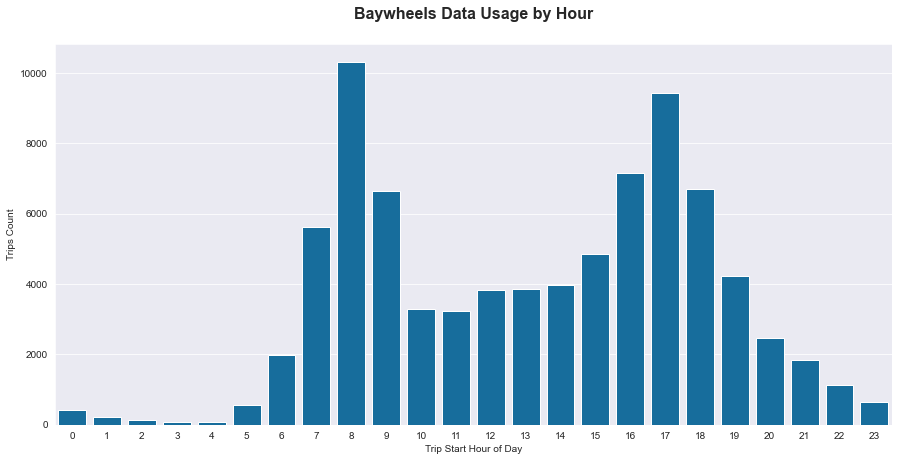

In [129]:
# Trip rates over day hours

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(15,7))

sb.countplot(data=df_Q1_2020_clean, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day')
plt.ylabel('Trips Count')
plt.title('Baywheels Data Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

In [130]:
df_Q1_2020_clean.start_hourofday.describe()

count    82791.000000
mean        13.226015
std          4.705778
min          0.000000
25%          9.000000
50%         14.000000
75%         17.000000
max         23.000000
Name: start_hourofday, dtype: float64

observation: most of the trips are happened at (07-09) and (16-18), going to work and returing from work

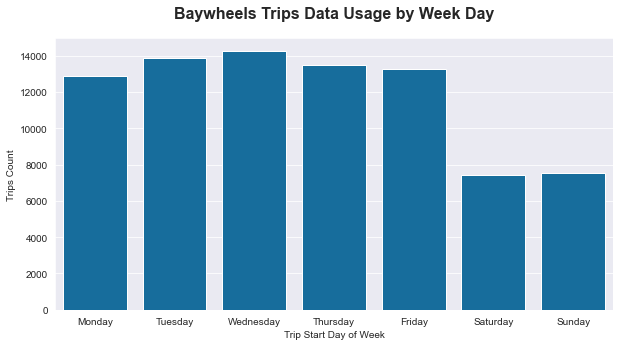

In [131]:
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

plt.figure(figsize=(10,5))
sb.countplot(data=df_Q1_2020_clean, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Trips Count');
plt.title('Baywheels Trips Data Usage by Week Day', y=1.05, fontsize=16, fontweight='bold');

In [132]:
df_Q1_2020_clean.start_dayofweek.describe()

count         82791
unique            7
top       Wednesday
freq          14262
Name: start_dayofweek, dtype: object

observation: most of the trips are during working days, with special high rates on wdensday

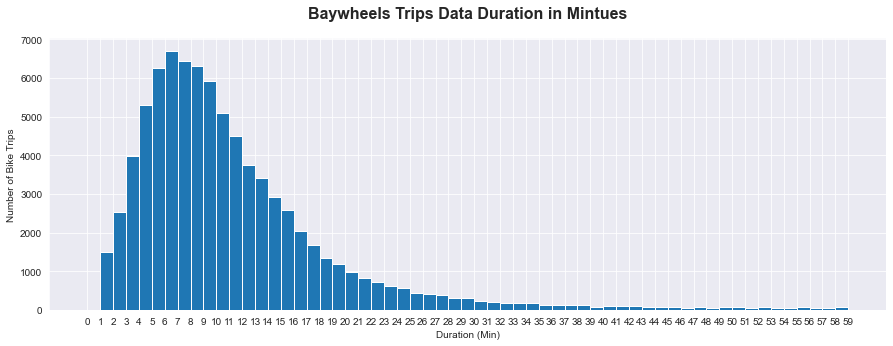

In [133]:
# Duration of the bike rides in minutes

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(15,5))

bin_edges = np.arange(0, 60, 1)

plt.hist(data = df_Q1_2020_clean, x = 'duration_minute', bins = bin_edges);

plt.title("Baywheels Trips Data Duration in Mintues", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips')
plt.xticks(bin_edges);

In [134]:
df_Q1_2020_clean.duration_minute.describe()

count    82791.000000
mean        12.221261
std         12.742346
min          1.000000
25%          6.150000
50%          9.400000
75%         14.116667
max        491.766667
Name: duration_minute, dtype: float64

observation: most of the trips duration are between 5 to 8 minutes

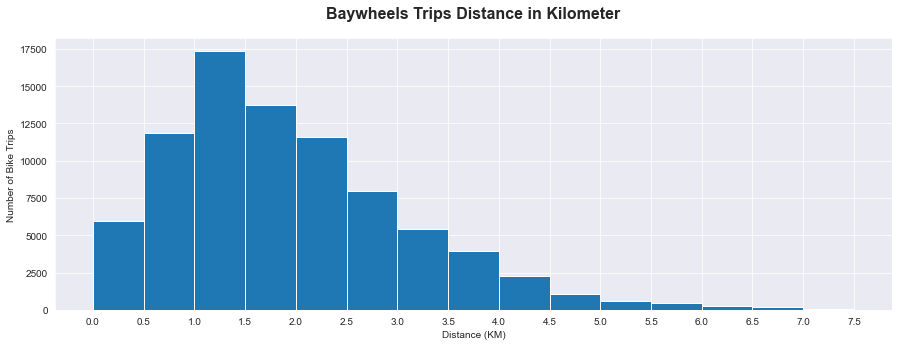

In [135]:
# Distance of the bike rides in KMs

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(15,5))

bin_edges = np.arange(0, 8, 0.5)

plt.hist(data = df_Q1_2020_clean, x = 'distance_km', bins = bin_edges);

plt.title("Baywheels Trips Distance in Kilometer", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (KM)')
plt.ylabel('Number of Bike Trips')
plt.xticks(bin_edges);

In [136]:
df_Q1_2020_clean.distance_km.describe()

count    82791.000000
mean         2.856570
std        108.911514
min          0.000000
25%          1.091548
50%          1.699364
75%          2.566812
max      12796.827118
Name: distance_km, dtype: float64

observation: most of the deestinations traveled are between 1000 to 1500 meters

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of rides peaked around 7-9am and 16-18pm during a day, 

> There are more rdies on workdays (Mon-Fri) compared to weekends,

> Most rides duration are short between 5 to 8 minutes, though there were some long outliers like 8 hrs,

> Most rides distance are short between 1 to 1.5 kilometer, though there were some long outliers like 12796 kilometer,

> No transformation was needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution are normal to some extent with some outliers,tidiness was not big issues, we just splited/extracted new variables from existing ones

## Bivariate Exploration


In [137]:
numeric_vars = ['duration_sec', 'distance_km', 'start_hourofday']
categoric_vars = [' user_type', 'rental_access_method', 'start_dayofweek']

Text(0.5, 1.05, 'Baywheels Trips Numeric Correlation')

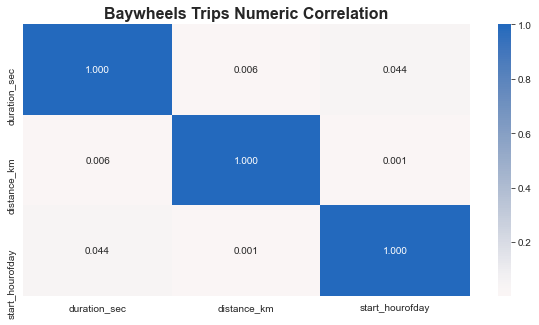

In [139]:
# Numeric correlation plot

sb.set_style('darkgrid')
plt.figure(figsize=(10,5))

sb.heatmap(df_Q1_2020_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title("Baywheels Trips Numeric Correlation", y=1.05, fontsize=16, fontweight='bold')



observation: no clear correlation among dataset numeric variables

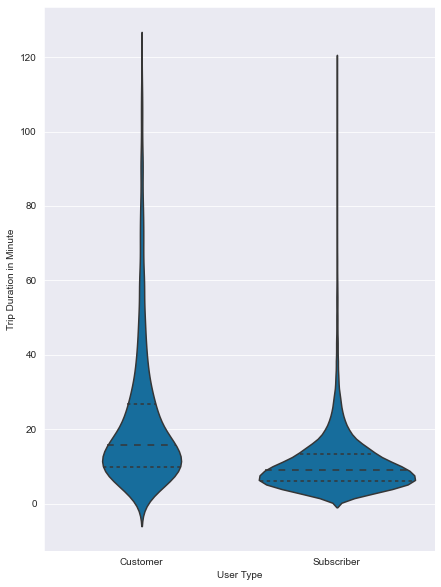

In [61]:
# Trip duration distribution vary between customers and subscribers

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(7,10))

sb.violinplot(data=df_Q1_2020_clean[df_Q1_2020_clean['duration_minute']<=120], x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

observation: The trip duration distribution is much narrower for subscribers and shorter trip as welll. subscribers seem to have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer time.

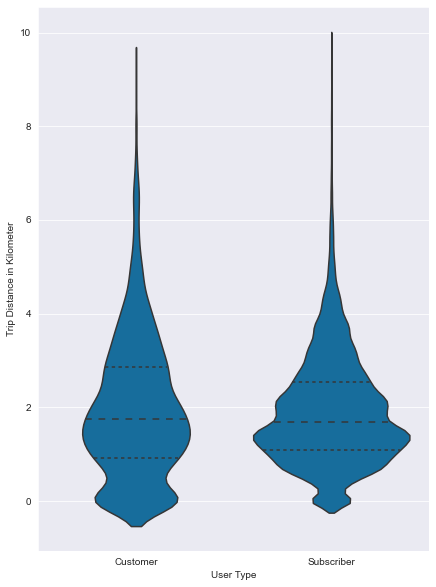

In [68]:
# Trip distance distribution vary between customers and subscribers

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(7,10))

sb.violinplot(data=df_Q1_2020_clean[df_Q1_2020_clean['distance_km']<=10], x='user_type', y='distance_km', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Distance in Kilometer');

observation: subscribers take more short trips

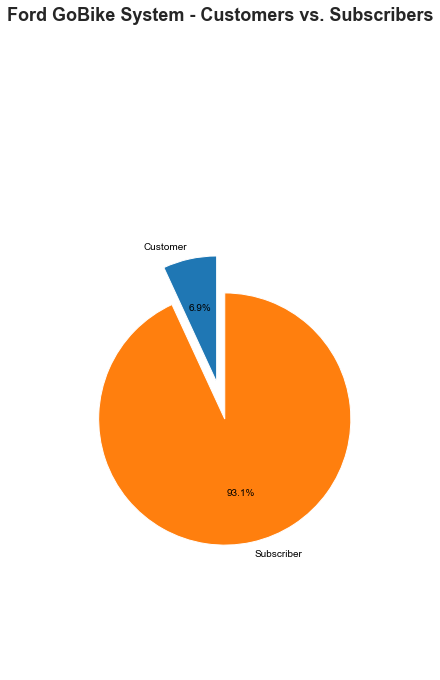

In [63]:
# Customers vs Subscribers for trip rides

customer_count = df_Q1_2020_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber_count = df_Q1_2020_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer_count / df_Q1_2020_clean['bike_id'].count()
subscriber_prop = subscriber_count / df_Q1_2020_clean['bike_id'].count()

sb.set_style('darkgrid')
plt.figure(figsize=(5,10))

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'color':'black'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=18, fontweight='bold');

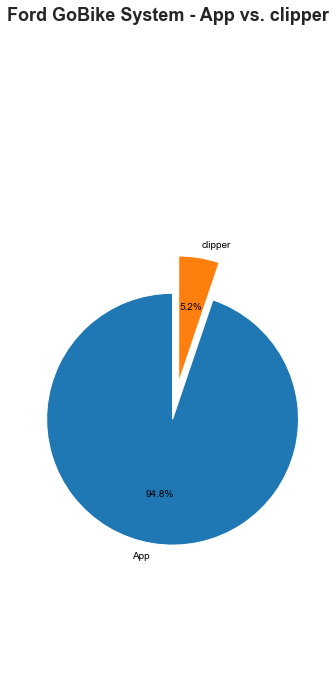

In [99]:
# App vs Dipper for trip rides

app_count = df_Q1_2020_clean.query('rental_access_method == "app"')['bike_id'].count()
dipper_count = df_Q1_2020_clean.query('rental_access_method == "clipper"')['bike_id'].count()
app_prop = app_count / df_Q1_2020_clean['bike_id'].count()
dipper_prop = dipper_count / df_Q1_2020_clean['bike_id'].count()
sb.set_style('darkgrid')
plt.figure(figsize=(5,10))

labels = ['App', 'clipper']
size = [app_prop, dipper_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'color':'black'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - App vs. clipper', y=1.05, fontsize=18, fontweight='bold');

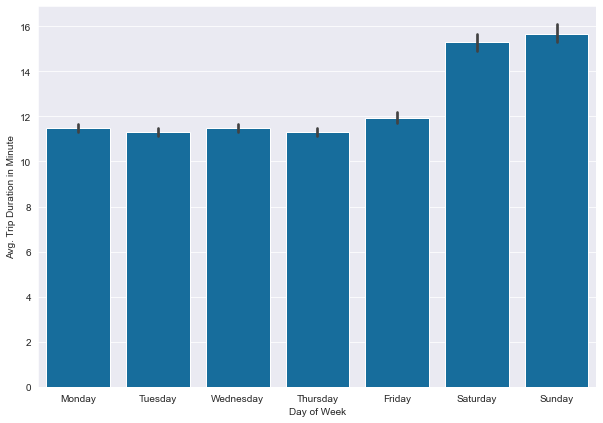

In [67]:
# Average Trip Duration on Weekdays

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(10,7))

sb.barplot(data=df_Q1_2020_clean, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

observation: The riding trips are much shorter on workdays compared to weekends.

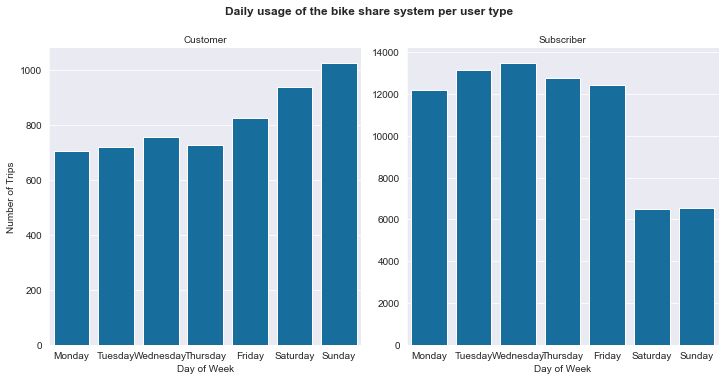

In [72]:
# Analysis of the number of trips taken by different user types across days of week

g = sb.catplot(data=df_Q1_2020_clean, x='start_dayofweek', col="user_type", kind='count', sharey = False, color = base_color)
g.set_axis_labels("Day of Week", "Number of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Daily usage of the bike share system per user type', y=1.05, fontsize=12, fontweight='semibold');

observation: subscribers usualy use the rides through the working days, while the customer tend to use more rides during weekends

The majority of users for the Ford Go Bike System are Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - User Type
>> - subscribers are:
>>> - more likey to take short length trips.
>>> - more likey to take short duration trips.
>>> - more likey to make rides during working days.
>> - customers are:
>>> - more likey to take long length trips.
>>> - more likey to take long duration trips.
>>> - more likey to make rides during weekend days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

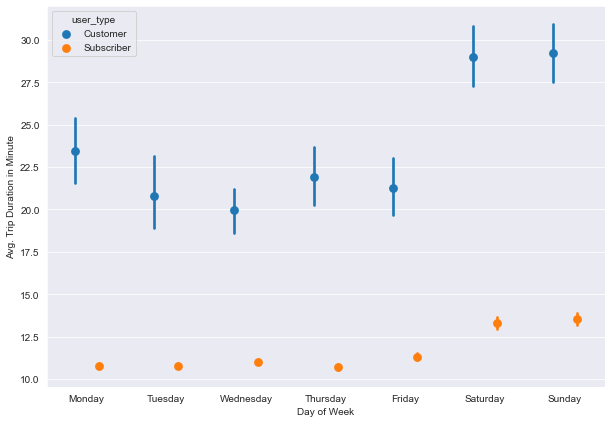

In [74]:
# Average trip duration vary in weekdays between customers and subscribers

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(10,7))

sb.pointplot(data=df_Q1_2020_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

observation: subscribers ride much shorter trips compared to customers on each day of the week. Both user types have an increase of trip duration on Saturdays and Sundays over working days, especially for customer riders. 
Subscribers usage seems to be more efficient than customers overall and maintained almost a very consistent average duration Monday through Friday.

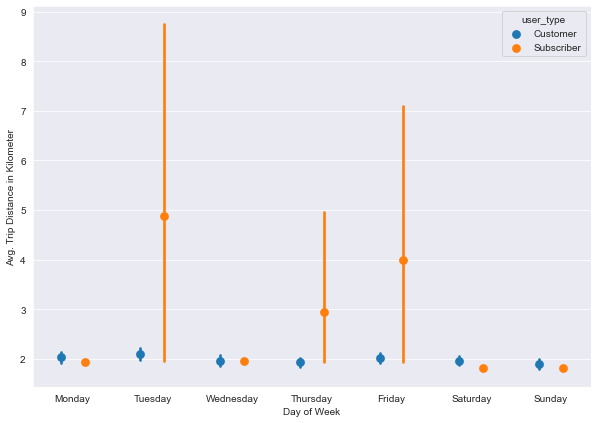

In [75]:
# Average trip distance vary in weekdays between customers and subscribers

base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')
plt.figure(figsize=(10,7))

sb.pointplot(data=df_Q1_2020_clean, x='start_dayofweek', y='distance_km', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Distance in Kilometer');

observation: Customer keep steady average distance on all weekdays, and subscribers vary on the avergae disatnce through the working days 

<Figure size 432x288 with 0 Axes>

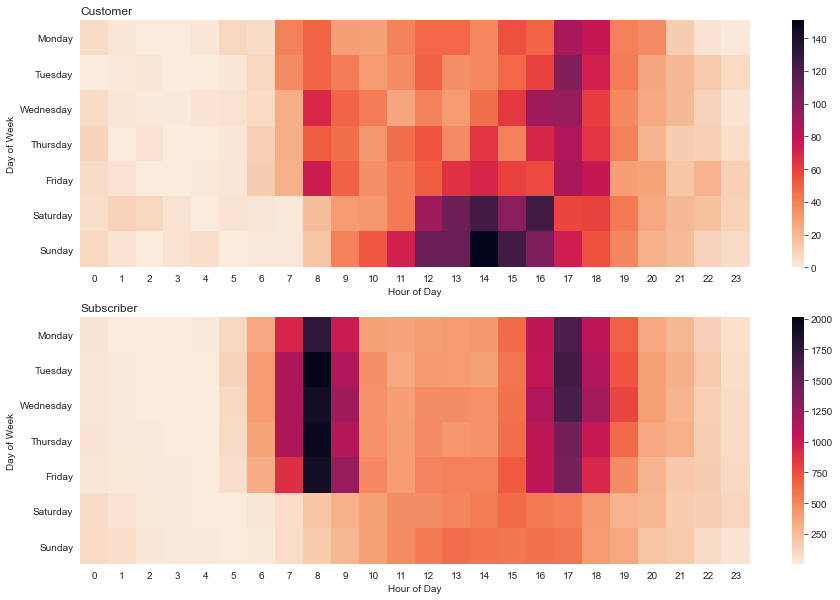

In [83]:
# The hourly usage vary during weekdays for customers and subscribers

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

sb.set_style('darkgrid')
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)

customers = df_Q1_2020_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_Q1_2020_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

observation: Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 7-9am and 16-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 12-16pm Saturday to Sunday, weekend.

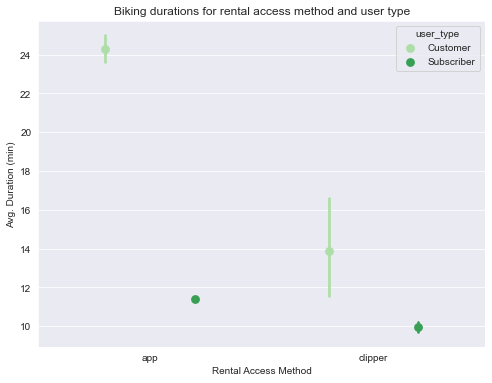

In [93]:

fig = plt.figure(figsize = [8,6]);

ax = sb.pointplot(data = df_Q1_2020_clean, x = 'rental_access_method', y = 'duration_minute', hue = 'user_type', 
                  palette = 'Greens', linestyles = '', dodge = 0.4);

plt.title('Biking durations for rental access method and user type');
plt.ylabel('Avg. Duration (min)');
plt.xlabel('Rental Access Method');

subscribers have steady duration for their ride while the customer vary in duration for their rides, dipper seems to have vary in duration over the app 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Almost the same discovered insights in the previous bivariate and univariate exploration.
> - The short period of usage for subscribers corresponds to their high concentration on rush hours from Monday through Friday, indicating the use is primarily for the work commute.
> - The flexible pattern of customer use shows that they are taking advantage of the bike sharing system quite differently from the subscribers, and heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> not too much as the current dataset for 2020 doesnot contain two must intersecting varaibles there are only two categroical variable user type and rental access with very far percentage between their values.